In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('./hotel_bookings.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape


(119390, 32)

In [4]:
df.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
corr = df.corr()
corr


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


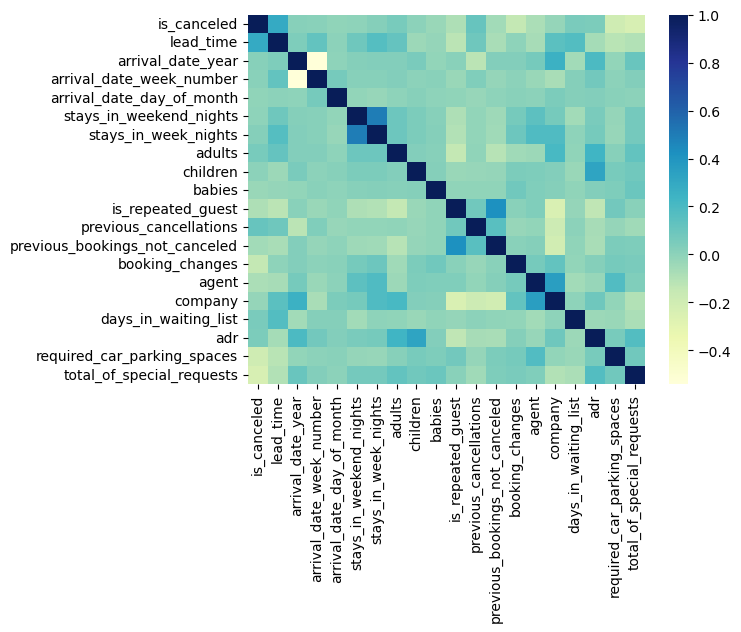

In [6]:
sns.heatmap(df.corr(), cmap='YlGnBu')
plt.show()


In [7]:
df.isna().sum()[df.isna().sum() > 0]


children         4
country        488
agent        16340
company     112593
dtype: int64

In [8]:
df['market_segment'].value_counts()
# violin plot


Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

**Handle NUll Values**


In [9]:
df.isna().sum()[df.isna().sum() > 0]


children         4
country        488
agent        16340
company     112593
dtype: int64

**Children**
- Replace the null values og children with 0 or with mean of the column


In [10]:

df['children'] = df['children'].fillna(0)


**Company**
- Since the company column has 94% of null values, we can drop the column


In [11]:
# ind = df.loc[((df['market_segment'] == 'Corporate') |
#               (df['distribution_channel'] == 'Corporate')) & (df['company'].isna()), 'company'].index


# # df.loc[ind,'company']=df.loc[ind,'company'].fillna(1)
# df.loc[ind, 'company'] = 'corporate'


In [12]:
# ind = df['company'].notna()
# df.loc[ind, 'company'] = 'corporate'
# df.loc[df['company'].isna(), 'company'] = 'individual'

df.drop(columns='company', inplace=True)


In [13]:
# sns.countplot(x='company', data=df, hue='is_canceled')


**Agent**
- Fill null values with Not Agent and available values to Agent


In [14]:
df.loc[df['agent'].notna(), 'agent'] = 'Agent'
df['agent'].fillna('Not Agent', inplace=True)


**Country**


In [15]:
df['country'].value_counts()


PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

Since the number of countries is 177 we need to reduce the number by clubbing countries based on continents


In [16]:
df.dropna(inplace=True)
df['country'].unique()


array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [17]:
europe = ['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'POL', 'DEU', 'BEL', 'CHE', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'EST',
          'CZE', 'FIN', 'LUX', 'SVN', 'ALB', 'UKR', 'SMR', 'LVA', 'SRB', 'AUT', 'BLR', 'LTU', 'TUR', 'HUN', 'HRV', 'GEO', 'AND', 'SVK',
          'MKD', 'BIH', 'GGY', 'BGR', 'MLT', 'ISL', 'MCO', 'LIE', 'MNE', 'GIB', 'JEY', 'IMN', 'FRO']

north_a = ['USA', 'MEX', 'PRI', 'CRI', 'CYM', 'LCA', 'CUB', 'JAM', 'UMI', 'BRB', 'AIA', 'DMA',
           'HND', 'NIC', 'GAB', 'PAN', 'SLV', 'GTM', 'DOM', 'BHS', 'KNA', 'VGB',  'GLP']

south_a = ['ARG', 'BRA', 'CHL', 'URY', 'COL', 'ABW',
           'VEN', 'SUR', 'PER', 'ECU', 'BOL', 'PRY', 'GUY']

asia = ['OMN', 'CN', 'IND', 'CHN', 'ISR', 'KOR', 'ARE', 'HKG', 'IRN', 'CYP', 'KWT', 'MDV', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'AZE', 'BHR',
        'THA', 'MYS', 'ARM', 'JPN', 'LKA', 'JOR', 'SYR', 'SGP', 'SAU', 'VNM', 'QAT', 'UZB', 'NPL', 'MAC', 'TWN', 'IRQ', 'KHM', 'BGD', 'TJK', 'TMP', 'MMR', 'LAO']

africa = ['MOZ', 'BWA', 'MAR', 'ZAF', 'AGO', 'ZMB', 'ZWE', 'DZA', 'TUN', 'CAF', 'NGA', 'SEN', 'SYC', 'CMR', 'MUS', 'COM', 'UGA', 'CIV',
          'BDI', 'EGY', 'MWI', 'MDG', 'TGO', 'DJI', 'STP', 'ETH', 'RWA', 'BEN', 'TZA', 'GHA', 'KEN', 'GNB', 'BFA', 'LBY', 'MLI', 'NAM',
          'MRT', 'SDN', 'SLE', 'MYT', 'CPV']

australia = ['AUS',  'FJI', 'NZL', 'PYF', 'ASM', 'KIR', 'NCL', 'PLW']

antartica = ['ATA', 'ATF']


# unk = ['Unknown']


In [18]:
def country_bin(x):
    if x in europe:
        return 'Europe'
    elif x in north_a:
        return 'North America'
    elif x in south_a:
        return 'South America'
    elif x in asia:
        return 'Asia'
    elif x in africa:
        return 'Africa'
    elif x in australia:
        return 'Australia'


df.country = df.country.apply(country_bin)  # Binning the country column


In [19]:
df.isna().sum()[df.isna().sum() > 0]


country    3
dtype: int64

**Analyze the data**


<AxesSubplot:xlabel='hotel', ylabel='count'>

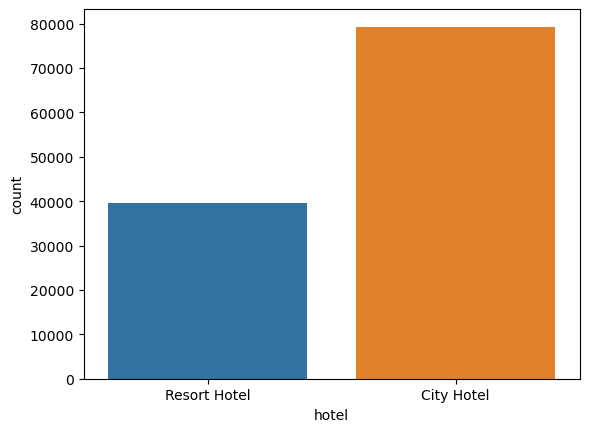

In [20]:
sns.countplot(x='hotel', data=df)


The dataset contains the data of 2 hotels 
- Resort Hotel and City Hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

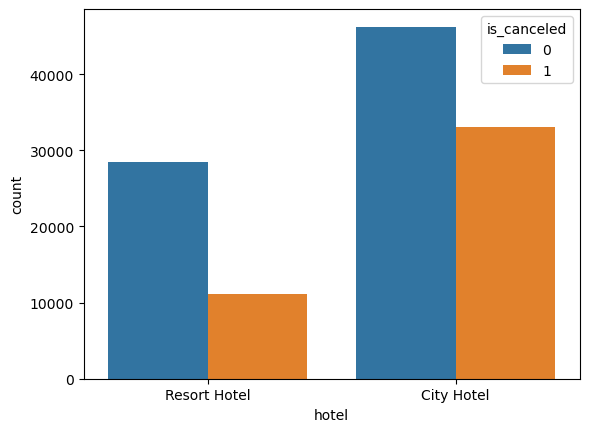

In [21]:
sns.countplot(x='hotel', data=df, hue='is_canceled')


city hotel has more bookings than resort hotel therefore it has more cancellations

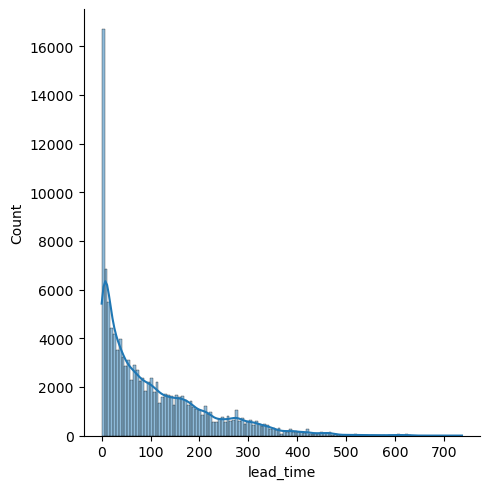

In [22]:
sns.displot(x='lead_time', data=df, kde=True)


<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

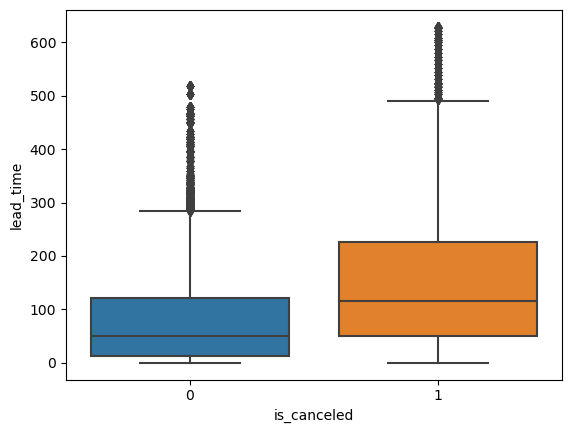

In [23]:
sns.boxplot(x='is_canceled',
            data=df.loc[df['hotel'] == 'City Hotel'], y='lead_time')


<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

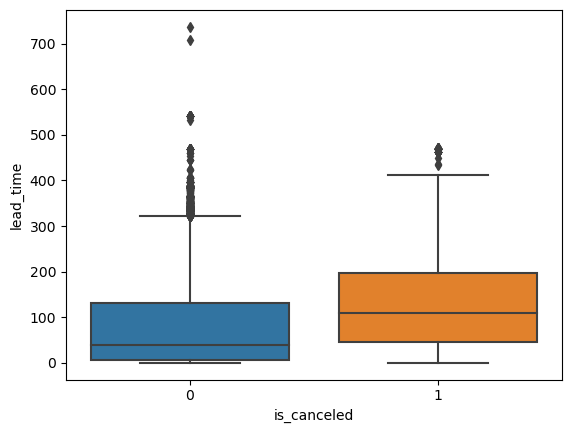

In [24]:
sns.boxplot(x='is_canceled', y='lead_time',
            data=df.loc[df.hotel == 'Resort Hotel'])


City hotel has more cancellations than resort hotel with lead time  > 500 days

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

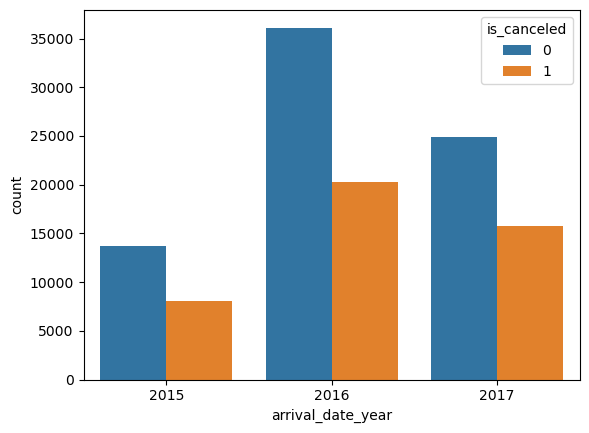

In [25]:
# plt.plot()
sns.countplot(x='arrival_date_year', data=df, hue='is_canceled')


In [26]:
tb = pd.crosstab(df.arrival_date_year, df.is_canceled, margins=True)
tb['per_1'] = tb[1]*100/tb['All']
tb


is_canceled,0,1,All,per_1
arrival_date_year,,,,
2015,13753,8110,21863,37.094635
2016,36122,20313,56435,35.993621
2017,24870,15734,40604,38.749877
All,74745,44157,118902,37.137306


In [27]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Arrival month**


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'July'),
  Text(1, 0, 'August'),
  Text(2, 0, 'September'),
  Text(3, 0, 'October'),
  Text(4, 0, 'November'),
  Text(5, 0, 'December'),
  Text(6, 0, 'January'),
  Text(7, 0, 'February'),
  Text(8, 0, 'March'),
  Text(9, 0, 'April'),
  Text(10, 0, 'May'),
  Text(11, 0, 'June')])

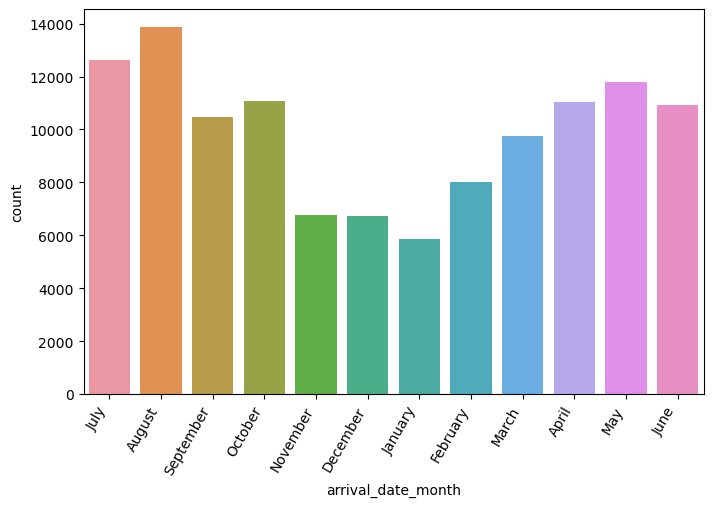

In [28]:
plt.rcParams['figure.figsize'] = [8, 5]
sns.countplot(x='arrival_date_month', data=df)
plt.xticks(rotation=60, ha='right')


August has the highest number of bookings and cancellations

Text(0.5, 1.0, 'Distribution of hotel')

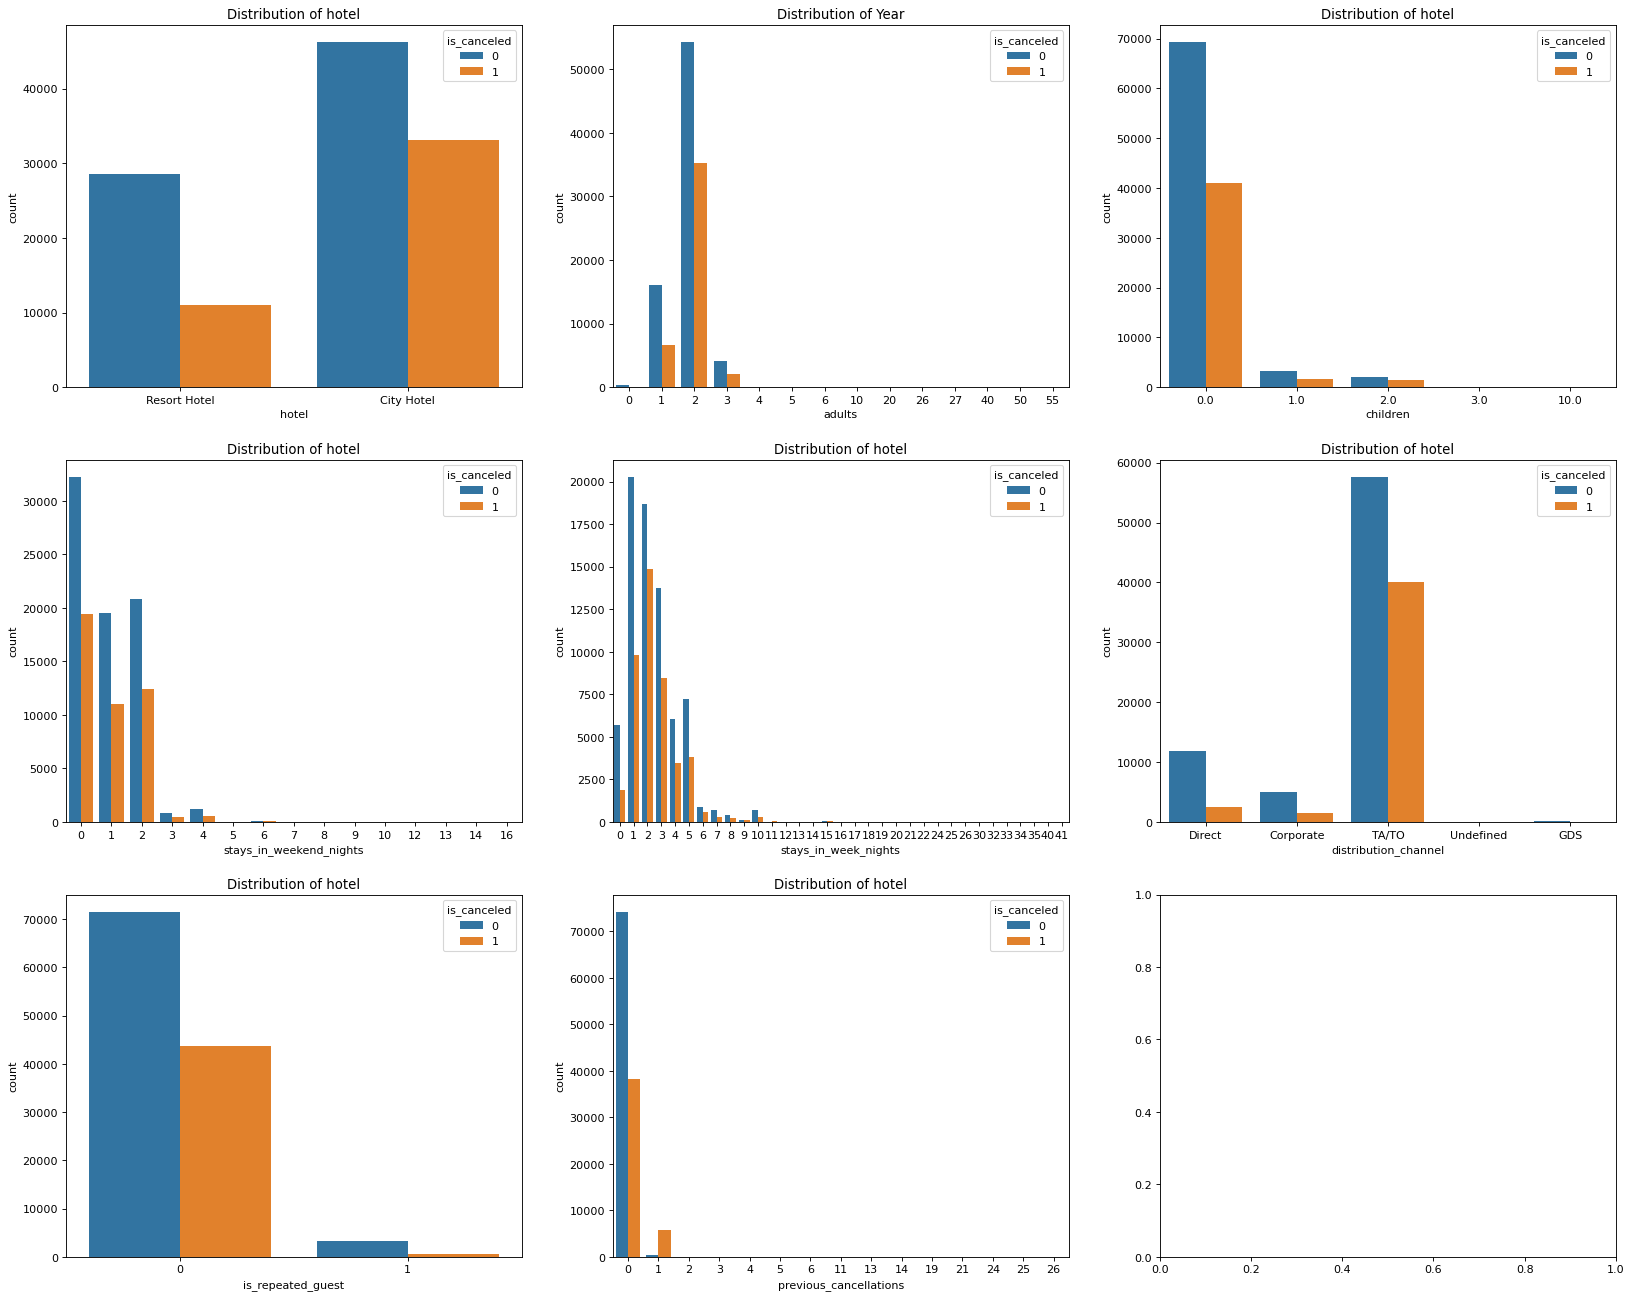

In [29]:
fig, ax = plt.subplots(3, 3, figsize=(25, 20), dpi=80)
sns.countplot(x='hotel', hue='is_canceled', data=df, ax=ax[0][0])
ax[0][0].set_title('Distribution of hotel')

sns.countplot(x='adults', hue='is_canceled', data=df, ax=ax[0][1])
ax[0][1].set_title('Distribution of Year')

sns.countplot(x='children', hue='is_canceled', data=df, ax=ax[0][2])
ax[0][2].set_title('Distribution of hotel')

sns.countplot(x='stays_in_weekend_nights',
              hue='is_canceled', data=df, ax=ax[1][0])
ax[1][0].set_title('Distribution of hotel')

sns.countplot(x='stays_in_week_nights',
              hue='is_canceled', data=df, ax=ax[1][1])
ax[1][1].set_title('Distribution of hotel')

sns.countplot(x='distribution_channel',
              hue='is_canceled', data=df, ax=ax[1][2])
ax[1][2].set_title('Distribution of hotel')

sns.countplot(x='is_repeated_guest', hue='is_canceled', data=df, ax=ax[2][0])
ax[2][0].set_title('Distribution of hotel')

sns.countplot(x='previous_cancellations',
              hue='is_canceled', data=df, ax=ax[2][1])
ax[2][1].set_title('Distribution of hotel')

# sns.distplot(x='adults', data=df, ax=ax[2][1])
# ax[2][1].set_title('Distribution of hotel')


In [30]:
# adults
df['adults'].value_counts()


2     89498
1     22735
3      6198
0       393
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

<AxesSubplot:xlabel='adults', ylabel='count'>

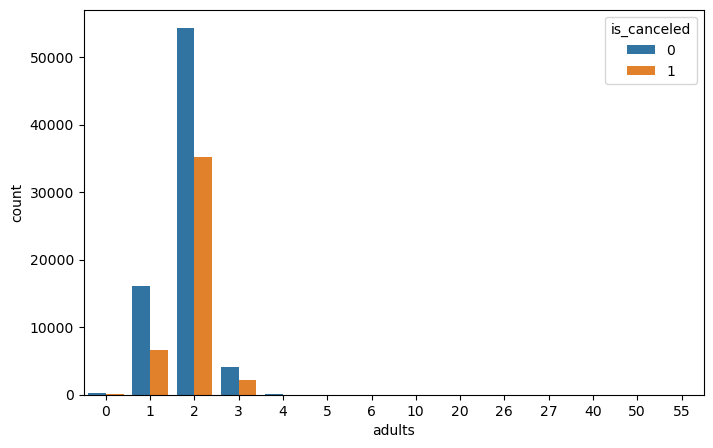

In [31]:
# adult
sns.countplot(x='adults', data=df, hue='is_canceled')


<AxesSubplot:xlabel='babies', ylabel='count'>

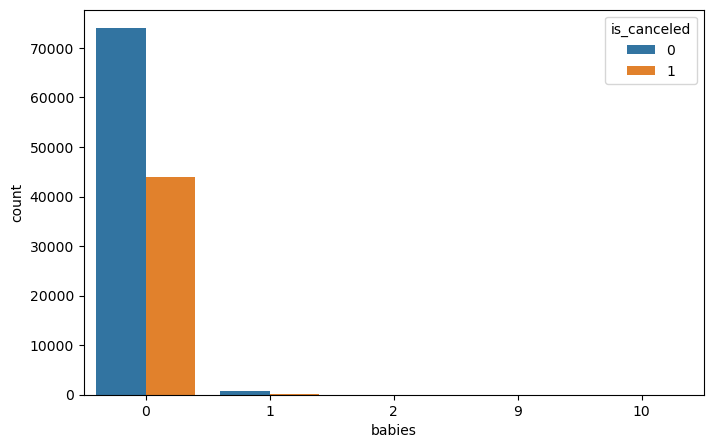

In [32]:
# babies
sns.countplot(x='babies', data=df, hue='is_canceled')


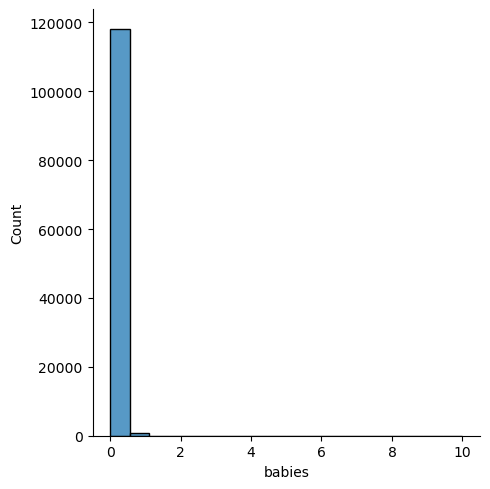

In [33]:
sns.displot(df.babies)


In [34]:
# meals
df['meal'].value_counts()


BB           91867
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdc3c21b310>,
 [Text(-0.8310995848098292, 0.7206063281216241, 'BB'),
  Text(0.5499497324111292, -0.9526569644005798, 'HB'),
  Text(1.0195585964496803, -0.4129167814530647, 'SC'),
  Text(1.0970743420487643, -0.0801741106484576, 'Undefined'),
  Text(1.099755504336084, -0.02319117682407196, 'FB')],
 [Text(-0.4533270462599068, 0.39305799715724943, '77.26%'),
  Text(0.29997258131516136, -0.5196310714912252, '12.14%'),
  Text(0.5561228707907346, -0.22522733533803524, '8.95%'),
  Text(0.5984041865720532, -0.04373133308097687, '0.98%'),
  Text(0.5998666387287731, -0.012649732813130159, '0.67%')])

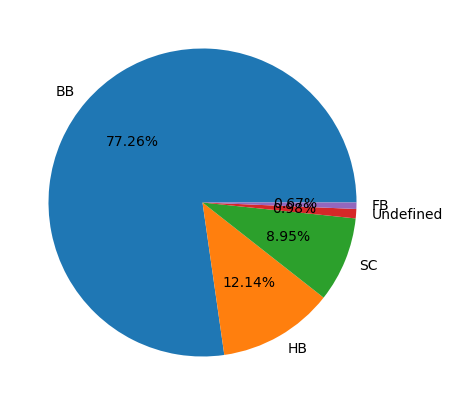

In [35]:
plt.pie(df.meal.value_counts(),
        labels=df.meal.value_counts().index, autopct='%.2f%%')


In [36]:
# country


<AxesSubplot:xlabel='country', ylabel='count'>

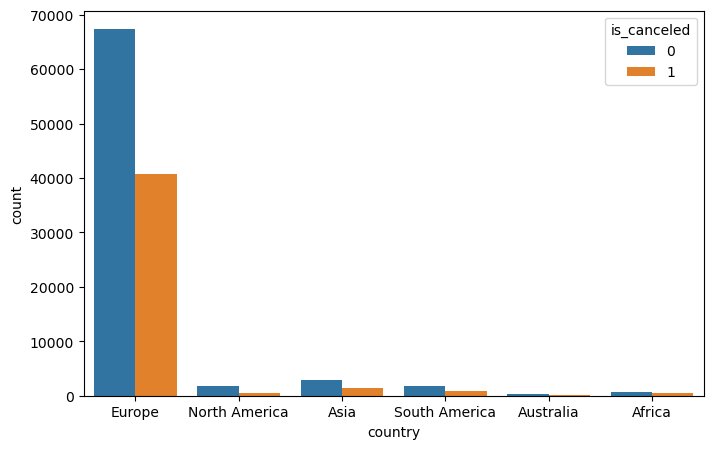

In [37]:
sns.countplot(x='country', data=df,hue='is_canceled')


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Corporate'),
  Text(2, 0, 'Online TA'),
  Text(3, 0, 'Offline TA/TO'),
  Text(4, 0, 'Complementary'),
  Text(5, 0, 'Groups'),
  Text(6, 0, 'Undefined'),
  Text(7, 0, 'Aviation')])

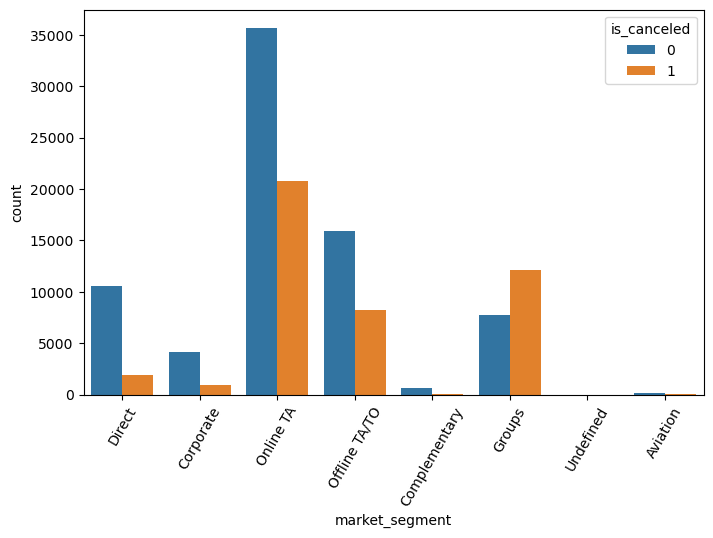

In [38]:
# df.
sns.countplot(x='market_segment', data=df, hue='is_canceled')
plt.xticks(rotation=60)


In [39]:
tb = pd.crosstab(df.market_segment, df.is_canceled, margins=True)
tb['per'] = tb[1]*100/tb['All']
tb


is_canceled,0,1,All,per
market_segment,,,,
Aviation,185,52,237,21.940928
Complementary,644,90,734,12.261580
Corporate,4133,978,5111,19.135199
Direct,10528,1921,12449,15.430958
Groups,7709,12097,19806,61.077451
Offline TA/TO,15882,8278,24160,34.263245
Online TA,35664,20739,56403,36.769321
Undefined,0,2,2,100.000000
All,74745,44157,118902,37.137306


In [40]:
df['distribution_channel'].value_counts()


TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [41]:
tb = pd.crosstab(df.distribution_channel, df.is_canceled, margins=True)
tb['per'] = tb[1]*100/tb['All']
tb


is_canceled,0,1,All,per
distribution_channel,,,,
Corporate,5037,1454,6491,22.400246
Direct,11940,2543,14483,17.558517
GDS,156,37,193,19.170984
TA/TO,57611,40119,97730,41.050854
Undefined,1,4,5,80.000000
All,74745,44157,118902,37.137306


<AxesSubplot:xlabel='is_repeated_guest', ylabel='count'>

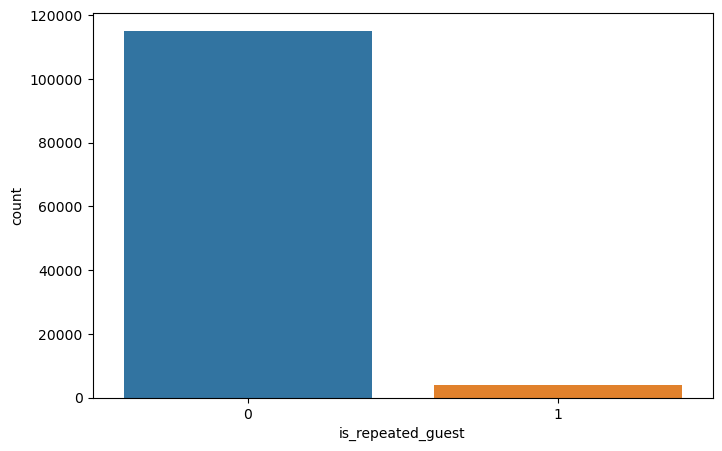

In [42]:
# is_repeated_guest
sns.countplot(x='is_repeated_guest', data=df)


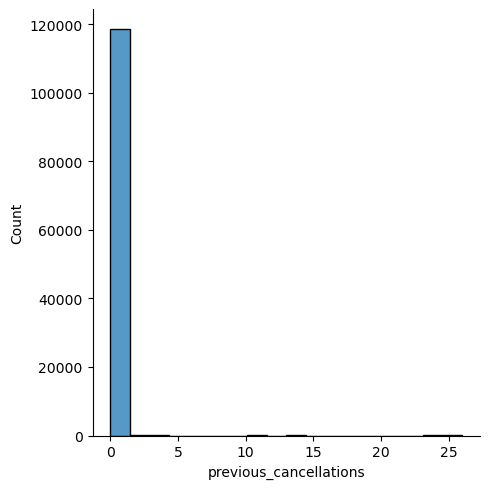

In [43]:
# previous_cancellations
# df['previous_cancellations'].value_counts()
sns.displot(df.previous_cancellations)


In [44]:
# prev booking not cancel

df['previous_bookings_not_canceled'].value_counts()


0     115505
1       1452
2        536
3        301
4        209
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

/tmp/ipykernel_10129/1592952910.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.previous_bookings_not_canceled)


<AxesSubplot:xlabel='previous_bookings_not_canceled', ylabel='Density'>

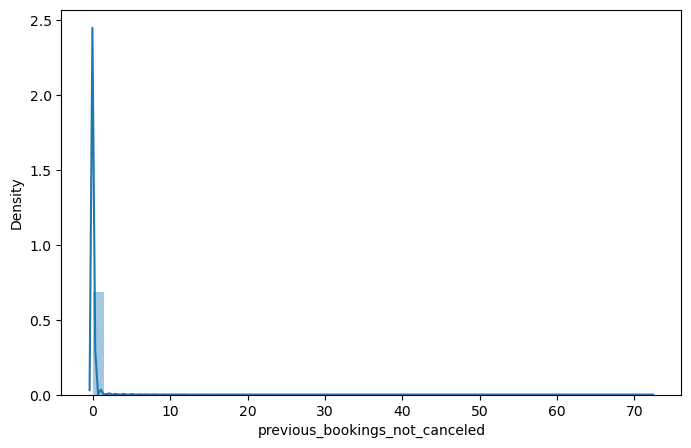

In [45]:
sns.distplot(df.previous_bookings_not_canceled)


In [46]:
# reserved room type
df['reserved_room_type'].value_counts()


A    85601
D    19173
E     6497
F     2890
G     2083
B     1118
C      931
H      601
L        6
P        2
Name: reserved_room_type, dtype: int64

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

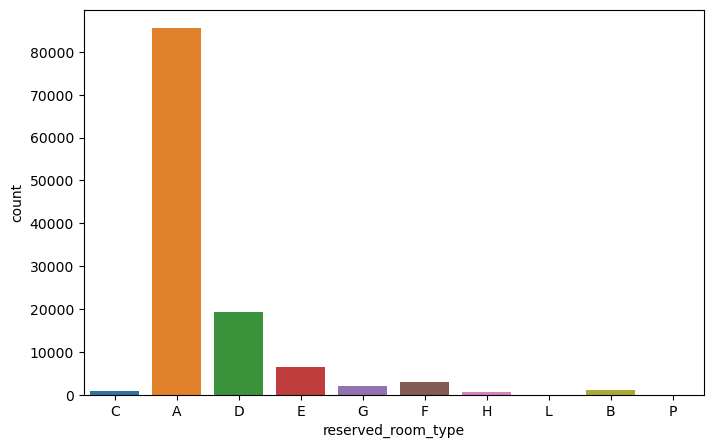

In [47]:
sns.countplot(x='reserved_room_type', data=df)


In [48]:
# assigned
df['assigned_room_type'].value_counts()


A    73863
D    25166
E     7738
F     3732
G     2539
C     2354
B     2163
H      708
I      357
K      279
P        2
L        1
Name: assigned_room_type, dtype: int64

<AxesSubplot:xlabel='assigned_room_type', ylabel='count'>

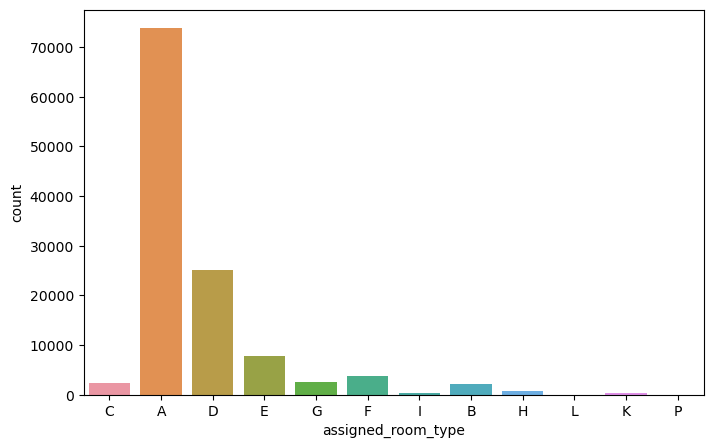

In [49]:
sns.countplot(x='assigned_room_type', data=df)


In [50]:
df['booking_changes'].value_counts()


0     100906
1      12639
2       3790
3        925
4        375
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

/tmp/ipykernel_10129/1007214199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.booking_changes, kde=True)


<AxesSubplot:xlabel='booking_changes', ylabel='Density'>

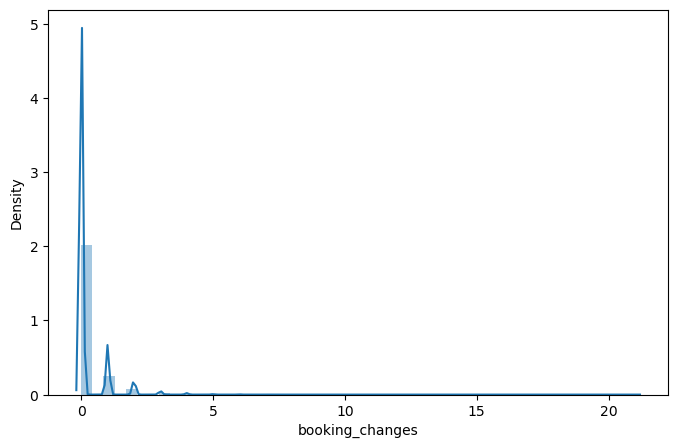

In [51]:
sns.distplot(df.booking_changes, kde=True)


In [52]:
df['deposit_type'].value_counts()


No Deposit    104167
Non Refund     14573
Refundable       162
Name: deposit_type, dtype: int64

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

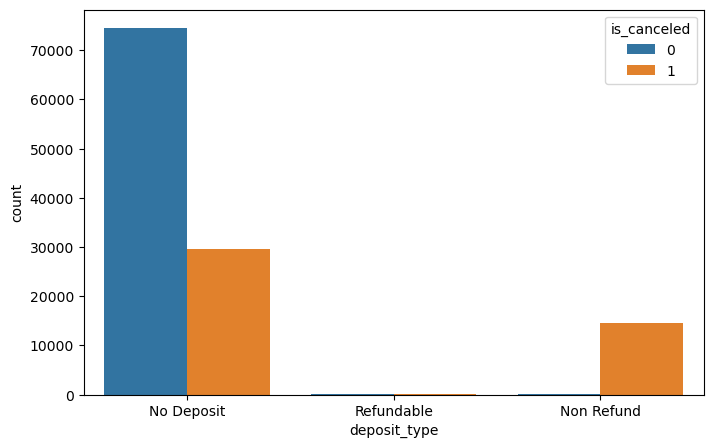

In [53]:
sns.countplot(x='deposit_type', data=df, hue='is_canceled')


In [54]:
tb = pd.crosstab(df.deposit_type, df.is_canceled, margins=True)
tb['per'] = tb[1]*100/tb['All']
tb


is_canceled,0,1,All,per
deposit_type,,,,
No Deposit,74526,29641,104167,28.455269
Non Refund,93,14480,14573,99.361834
Refundable,126,36,162,22.222222
All,74745,44157,118902,37.137306


In [55]:
# agent
df['agent'].value_counts()


Agent        102896
Not Agent     16006
Name: agent, dtype: int64

In [56]:
# days_in_waiting_list
df['days_in_waiting_list'].value_counts()


0      115204
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

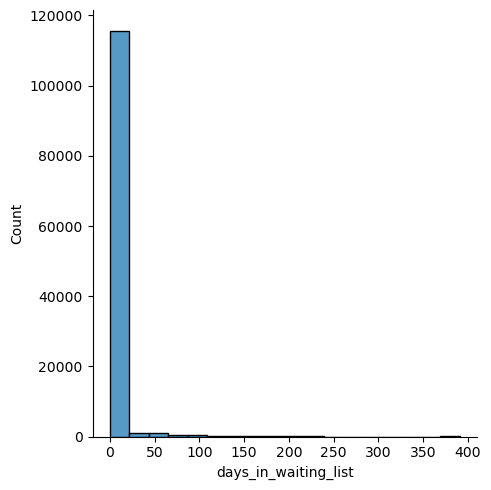

In [57]:
sns.displot(df['days_in_waiting_list'])


In [58]:
# customer_type
df['customer_type'].value_counts()


Transient          89174
Transient-Party    25082
Contract            4076
Group                570
Name: customer_type, dtype: int64

<AxesSubplot:xlabel='customer_type', ylabel='count'>

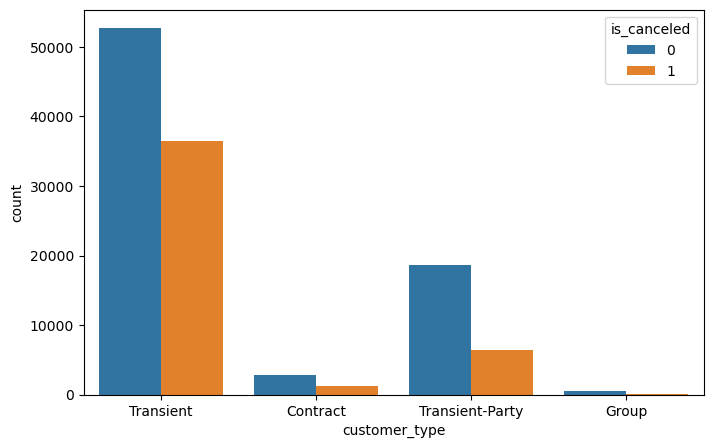

In [59]:
sns.countplot(x='customer_type', data=df, hue='is_canceled')


In [60]:
tb = pd.crosstab(df.customer_type, df.is_canceled, margins=True)
tb['per_1'] = tb[1]*100/tb['All']
tb


is_canceled,0,1,All,per_1
customer_type,,,,
Contract,2814,1262,4076,30.961727
Group,512,58,570,10.175439
Transient,52714,36460,89174,40.886357
Transient-Party,18705,6377,25082,25.424607
All,74745,44157,118902,37.137306


In [61]:
# adr
df['adr'].value_counts()


62.00     3753
75.00     2710
90.00     2471
65.00     2397
0.00      1938
          ... 
96.09        1
48.03        1
89.43        1
63.07        1
157.71       1
Name: adr, Length: 8870, dtype: int64

In [62]:
# required_car_parking_spaces
df['required_car_parking_spaces'].value_counts()


0    111592
1      7277
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [63]:
tb = pd.crosstab(df.required_car_parking_spaces, df.is_canceled, margins=True)
tb['per_1'] = tb[1]*100/tb['All']
tb


is_canceled,0,1,All,per_1
required_car_parking_spaces,,,,
0,67435,44157,111592,39.570041
1,7277,0,7277,0.000000
2,28,0,28,0.000000
3,3,0,3,0.000000
8,2,0,2,0.000000
All,74745,44157,118902,37.137306


In [64]:
# total_of_special_requests
df['total_of_special_requests'].value_counts()


0    69991
1    33124
2    12923
3     2487
4      339
5       38
Name: total_of_special_requests, dtype: int64

In [65]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [66]:

df['total_stay'] = df.stays_in_week_nights+df.stays_in_weekend_nights
# df.drop(columns=['stays_in_week_nights',
        # 'stays_in_weekend_nights'], inplace=True)
df.drop(columns=['arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights','babies', 'meal', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'reserved_room_type',  'reservation_status', 'reservation_status_date'],inplace=True)


In [67]:
Y=df['is_canceled']
X=df.drop(columns='is_canceled')

X

# from sklearn.model_selection import train_test_split
# from 

,hotel,lead_time,arrival_date_year,arrival_date_month,adults,children,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,assigned_room_type,booking_changes,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay
0,Resort Hotel,342,2015,July,2,0.0,Europe,Direct,Direct,0,0,C,3,No Deposit,Not Agent,Transient,0.00,0,0,0
1,Resort Hotel,737,2015,July,2,0.0,Europe,Direct,Direct,0,0,C,4,No Deposit,Not Agent,Transient,0.00,0,0,0
2,Resort Hotel,7,2015,July,1,0.0,Europe,Direct,Direct,0,0,C,0,No Deposit,Not Agent,Transient,75.00,0,0,1
3,Resort Hotel,13,2015,July,1,0.0,Europe,Corporate,Corporate,0,0,A,0,No Deposit,Agent,Transient,75.00,0,0,1
4,Resort Hotel,14,2015,July,2,0.0,Europe,Online TA,TA/TO,0,0,A,0,No Deposit,Agent,Transient,98.00,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,2,0.0,Europe,Offline TA/TO,TA/TO,0,0,A,0,No Deposit,Agent,Transient,96.14,0,0,7
119386,City Hotel,102,2017,August,3,0.0,Europe,Online TA,TA/TO,0,0,E,0,No Deposit,Agent,Transient,225.43,0,2,7
119387,City Hotel,34,2017,August,2,0.0,Europe,Online TA,TA/TO,0,0,D,0,No Deposit,Agent,Transient,157.71,0,4,7
119388,City Hotel,109,2017,August,2,0.0,Europe,Online TA,TA/TO,0,0,A,0,No Deposit,Agent,Transient,104.40,0,0,7


In [68]:
# encoding

from sklearn.preprocessing import LabelEncoder

le_htl = LabelEncoder()
X['hotel'] = le_htl.fit_transform(X['hotel'])

le_agent = LabelEncoder()
X['agent'] = le_agent.fit_transform(X['agent'])



In [69]:
X

,hotel,lead_time,arrival_date_year,arrival_date_month,adults,children,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,assigned_room_type,booking_changes,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay
0,1,342,2015,July,2,0.0,Europe,Direct,Direct,0,0,C,3,No Deposit,1,Transient,0.00,0,0,0
1,1,737,2015,July,2,0.0,Europe,Direct,Direct,0,0,C,4,No Deposit,1,Transient,0.00,0,0,0
2,1,7,2015,July,1,0.0,Europe,Direct,Direct,0,0,C,0,No Deposit,1,Transient,75.00,0,0,1
3,1,13,2015,July,1,0.0,Europe,Corporate,Corporate,0,0,A,0,No Deposit,0,Transient,75.00,0,0,1
4,1,14,2015,July,2,0.0,Europe,Online TA,TA/TO,0,0,A,0,No Deposit,0,Transient,98.00,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,2,0.0,Europe,Offline TA/TO,TA/TO,0,0,A,0,No Deposit,0,Transient,96.14,0,0,7
119386,0,102,2017,August,3,0.0,Europe,Online TA,TA/TO,0,0,E,0,No Deposit,0,Transient,225.43,0,2,7
119387,0,34,2017,August,2,0.0,Europe,Online TA,TA/TO,0,0,D,0,No Deposit,0,Transient,157.71,0,4,7
119388,0,109,2017,August,2,0.0,Europe,Online TA,TA/TO,0,0,A,0,No Deposit,0,Transient,104.40,0,0,7


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        118902 non-null  int64  
 1   lead_time                    118902 non-null  int64  
 2   arrival_date_year            118902 non-null  int64  
 3   arrival_date_month           118902 non-null  object 
 4   adults                       118902 non-null  int64  
 5   children                     118902 non-null  float64
 6   country                      118899 non-null  object 
 7   market_segment               118902 non-null  object 
 8   distribution_channel         118902 non-null  object 
 9   is_repeated_guest            118902 non-null  int64  
 10  previous_cancellations       118902 non-null  int64  
 11  assigned_room_type           118902 non-null  object 
 12  booking_changes              118902 non-null  int64  
 13 

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer([('encode',OneHotEncoder(),[3,6,7,8,11,13,15])],remainder='passthrough')
X=ct.fit_transform(X)

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sc=StandardScaler()
X=sc.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)


In [73]:
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)

y_pred=classifier.predict(X_test)


In [74]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test,y_pred))


0.809637946259619


In [75]:
# from sklearn.svm import SVC

# classifier=SVC(C=10,random_state=0)
# classifier.fit(X_train,Y_train)
# y_pred=classifier.predict(X_test)



# print(accuracy_score(Y_test,y_pred))

In [78]:
X_test.shape

(23781, 64)

In [77]:
from sklearn.ensemble import RandomForestClassifier

# n_estimator: cout of decision tree
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

print(accuracy_score(Y_test, y_pred))


KeyboardInterrupt: 